In [1]:
# Plik beauty.csv zawiera dane z pracy Hamermesha i Parker (2005) na temat oceny piękna instruktorów
# i jakości uch nauczania dla kilku kursów na University of Texas.
# Oceny dydaktyczne przeprowadzono pod koniec semestru, a oceny urody dokonano
# później przez sześciu studentów, którzy nie uczestniczyli w zajęciach i nie byli świadomi ocen kursu.

In [2]:
import pandas as pd

data = pd.read_csv("/home/ayane/AiBD_Lab6/Zad2/beauty.csv")

In [3]:
# Show data in *.csv file
print(data)

     tenured  profnumber  minority  age  beautyf2upper  beautyflowerdiv  \
0          0           1         1   36              6                5   
1          1           2         0   59              2                4   
2          1           3         0   51              5                5   
3          1           4         0   40              4                2   
4          0           5         0   31              9                7   
..       ...         ...       ...  ...            ...              ...   
458        0          93         0   32              9                6   
459        0          93         0   32              9                6   
460        0          94         1   42              7                3   
461        0          94         1   42              7                3   
462        0          94         1   42              7                3   

     beautyfupperdiv  beautym2upper  beautymlowerdiv  beautymupperdiv  ...  \
0                  7 

In [4]:
# Regresja
import statsmodels.api as sm

X = data['btystdave']
Y = data['courseevaluation']
X = sm.add_constant(X) # adding a constant
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
    
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:       courseevaluation   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     17.08
Date:                Wed, 04 Dec 2019   Prob (F-statistic):           4.25e-05
Time:                        17:07:16   Log-Likelihood:                -375.32
No. Observations:                 463   AIC:                             754.6
Df Residuals:                     461   BIC:                             762.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0100      0.026    157.205      0.0

/home/ayane/anaconda3/envs/anaconda_env_py3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [5]:
# Variables taken from model above
const_coef = 4.0100
btystdave_coef = 0.1330

# We know btystdave and want to predict courseevaluation
btystdave = data['btystdave']

for row in data:
    predicted_courseevaluation = (const_coef) + (btystdave_coef)*btystdave

# Predicted data
print(predicted_courseevaluation)

0      4.036808
1      3.900131
2      3.922176
3      3.908080
4      4.199052
         ...   
458    4.162025
459    4.162025
460    4.054163
461    4.054163
462    4.054163
Name: btystdave, Length: 463, dtype: float64


In [6]:
# Original data
print(data['courseevaluation'])

0      4.3
1      4.5
2      3.7
3      4.3
4      4.4
      ... 
458    3.2
459    4.3
460    3.3
461    3.2
462    4.1
Name: courseevaluation, Length: 463, dtype: float64


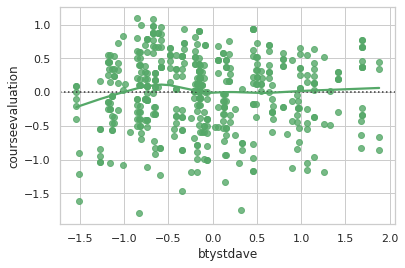

In [7]:
#Residua
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#Without this line plot appers in figure
%matplotlib inline

sns.set(style="whitegrid")

# Plot the residuals after fitting a linear model
sns.residplot(data['btystdave'], data['courseevaluation'], lowess=True, color="g")
plt.show()

In [8]:
# Regresja
import statsmodels.api as sm

X = data[['btystdave', 'btystdf2u', 'btystdfl', 'btystdfu', 'btystdm2u', 'btystdml', 'btystdmu']]
Y = data['courseevaluation']
X = sm.add_constant(X) # adding a constant
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
    
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:       courseevaluation   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     3.929
Date:                Wed, 04 Dec 2019   Prob (F-statistic):           0.000355
Time:                        17:07:17   Log-Likelihood:                -370.16
No. Observations:                 463   AIC:                             756.3
Df Residuals:                     455   BIC:                             789.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0133      0.026    154.810      0.0

/home/ayane/anaconda3/envs/anaconda_env_py3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [9]:
# Variables taken from model above
const_coef = 4.0133
btystdave_coef = -1.624e+04
btystdf2u_coef = 2707.3179
btystdfl_coef = 2707.2809
btystdfu_coef = 2707.3710
btystdm2u_coef = 2707.3325
btystdml_coef = 2707.2221
btystdmu_coef = 2707.3722

# We know btystdave and want to predict courseevaluation
btystdave = data[['btystdave', 'btystdf2u', 'btystdfl', 'btystdfu', 'btystdm2u', 'btystdml', 'btystdmu']]

for row in data:
    predicted_courseevaluation = (const_coef) + (btystdave_coef)*btystdave + (btystdf2u_coef)*btystdave + (btystdfl_coef)*btystdave +(btystdfu_coef)*btystdave + (btystdm2u_coef)*btystdave + (btystdml_coef)*btystdave + (btystdmu_coef)*btystdave

# Predicted data
print(predicted_courseevaluation)

     btystdave  btystdf2u  btystdfl   btystdfu  btystdm2u   btystdml  \
0     4.798724   5.140789  5.797950   7.425996   6.669672   0.506107   
1     0.794392  -2.296683  3.726875   1.764936  -0.397277   0.506107   
2     1.440248   3.281421  5.797950  -2.009102  -0.397277   0.506107   
3     1.027287   1.422054 -0.415276   3.651957  -2.752928   2.795524   
4     9.552103  10.718893  9.940103  11.200037   6.669672  11.953195   
..         ...        ...       ...        ...        ...        ...   
458   8.467289  10.718893  7.869025   5.538976   4.314022  11.953195   
459   8.467289  10.718893  7.869025   5.538976   4.314022  11.953195   
460   5.307169   7.000156  1.655799   9.313015   1.958373   5.084942   
461   5.307169   7.000156  1.655799   9.313015   1.958373   5.084942   
462   5.307169   7.000156  1.655799   9.313015   1.958373   5.084942   

      btystdmu  
0     3.251834  
1     1.462388  
2     1.462388  
3     1.462388  
4     6.830725  
..         ...  
458  10.409616  

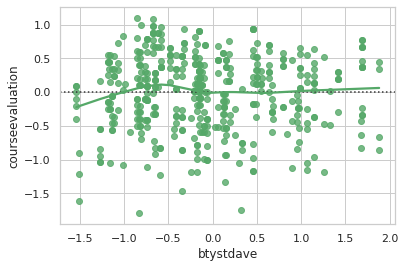

In [10]:
# Plot the residuals after fitting a linear model
sns.residplot(data['btystdave'], data['courseevaluation'], lowess=True, color="g")
plt.show()

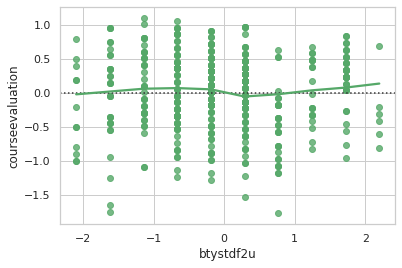

In [11]:
# Plot the residuals after fitting a linear model
sns.residplot(data['btystdf2u'], data['courseevaluation'], lowess=True, color="g")
plt.show()

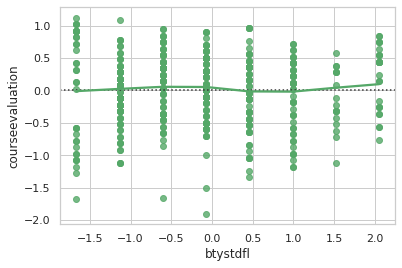

In [12]:
# Plot the residuals after fitting a linear model
sns.residplot(data['btystdfl'], data['courseevaluation'], lowess=True, color="g")
plt.show()

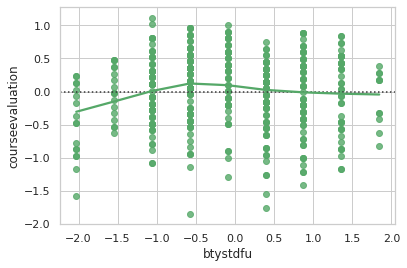

In [13]:
# Plot the residuals after fitting a linear model
sns.residplot(data['btystdfu'], data['courseevaluation'], lowess=True, color="g")
plt.show()

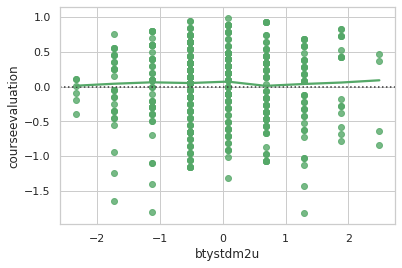

In [14]:
# Plot the residuals after fitting a linear model
sns.residplot(data['btystdm2u'], data['courseevaluation'], lowess=True, color="g")
plt.show()

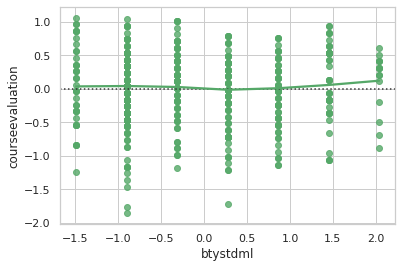

In [15]:
# Plot the residuals after fitting a linear model
sns.residplot(data['btystdml'], data['courseevaluation'], lowess=True, color="g")
plt.show()

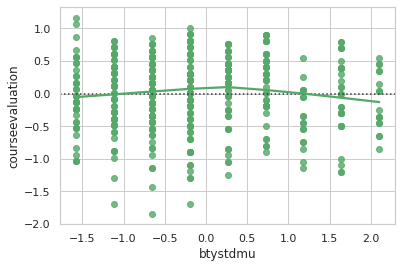

In [16]:
# Plot the residuals after fitting a linear model
sns.residplot(data['btystdmu'], data['courseevaluation'], lowess=True, color="g")
plt.show()